# Bike-sharing System

Problem Statement : Bike Sharing system are meant to rent the bucycle and return to the different place for the bike sharing purpose in Washington DC . so we are provided with rental data spanning for 2 years . now we have to predict the total count of bikes rented during each hour covered by the test set, using only information available oprior to the rental period.

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
df = pd.read_csv('train_bikes.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [83]:
df.shape # checking the rows and columns in the data

(10886, 12)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [85]:
df.isnull().sum() # so we are not having any missing values in our data!

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

d:\anacondafiles\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='season', ylabel='count'>

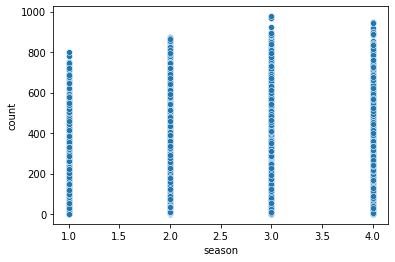

In [86]:
sns.scatterplot('season','count',data=df)

d:\anacondafiles\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='holiday', ylabel='count'>

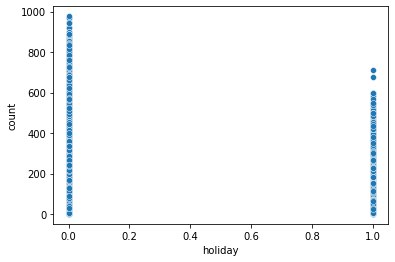

In [87]:
sns.scatterplot('holiday','count',data=df)

d:\anacondafiles\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='workingday', ylabel='count'>

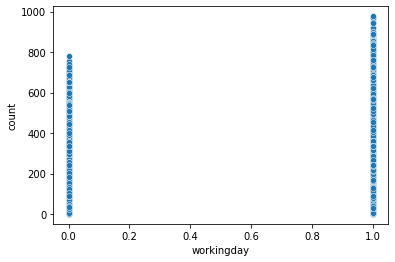

In [88]:
sns.scatterplot('workingday','count',data=df)

d:\anacondafiles\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='weather', ylabel='count'>

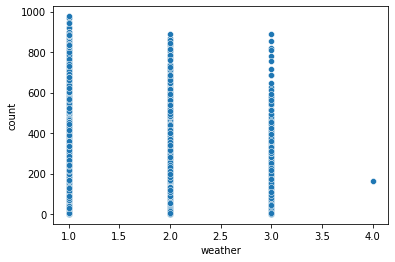

In [89]:
sns.scatterplot('weather','count',data=df)

d:\anacondafiles\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='temp', ylabel='count'>

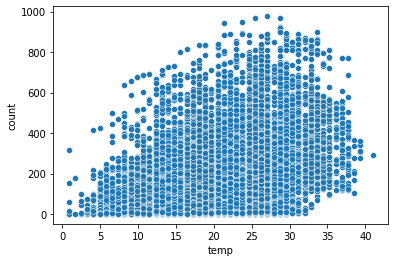

In [90]:
sns.scatterplot('temp','count',data=df)

d:\anacondafiles\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='atemp', ylabel='count'>

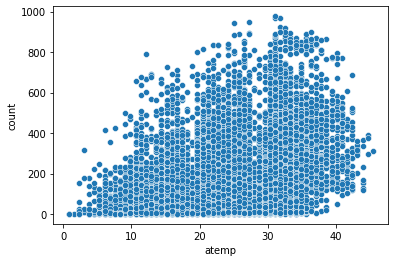

In [91]:
sns.scatterplot('atemp','count',data=df)

d:\anacondafiles\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='windspeed', ylabel='count'>

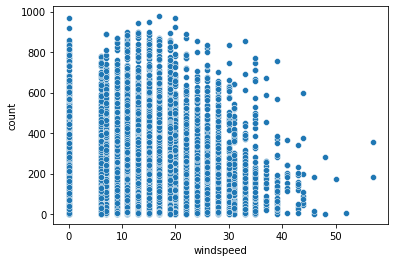

In [92]:
sns.scatterplot('windspeed','count',data=df)

d:\anacondafiles\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='casual', ylabel='count'>

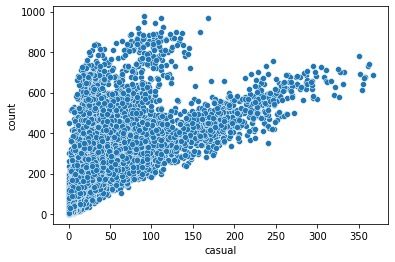

In [93]:
sns.scatterplot('casual','count',data=df)

d:\anacondafiles\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='registered', ylabel='count'>

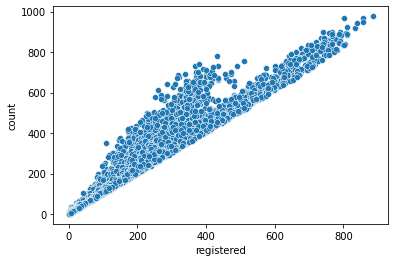

In [94]:
sns.scatterplot('registered','count',data=df)

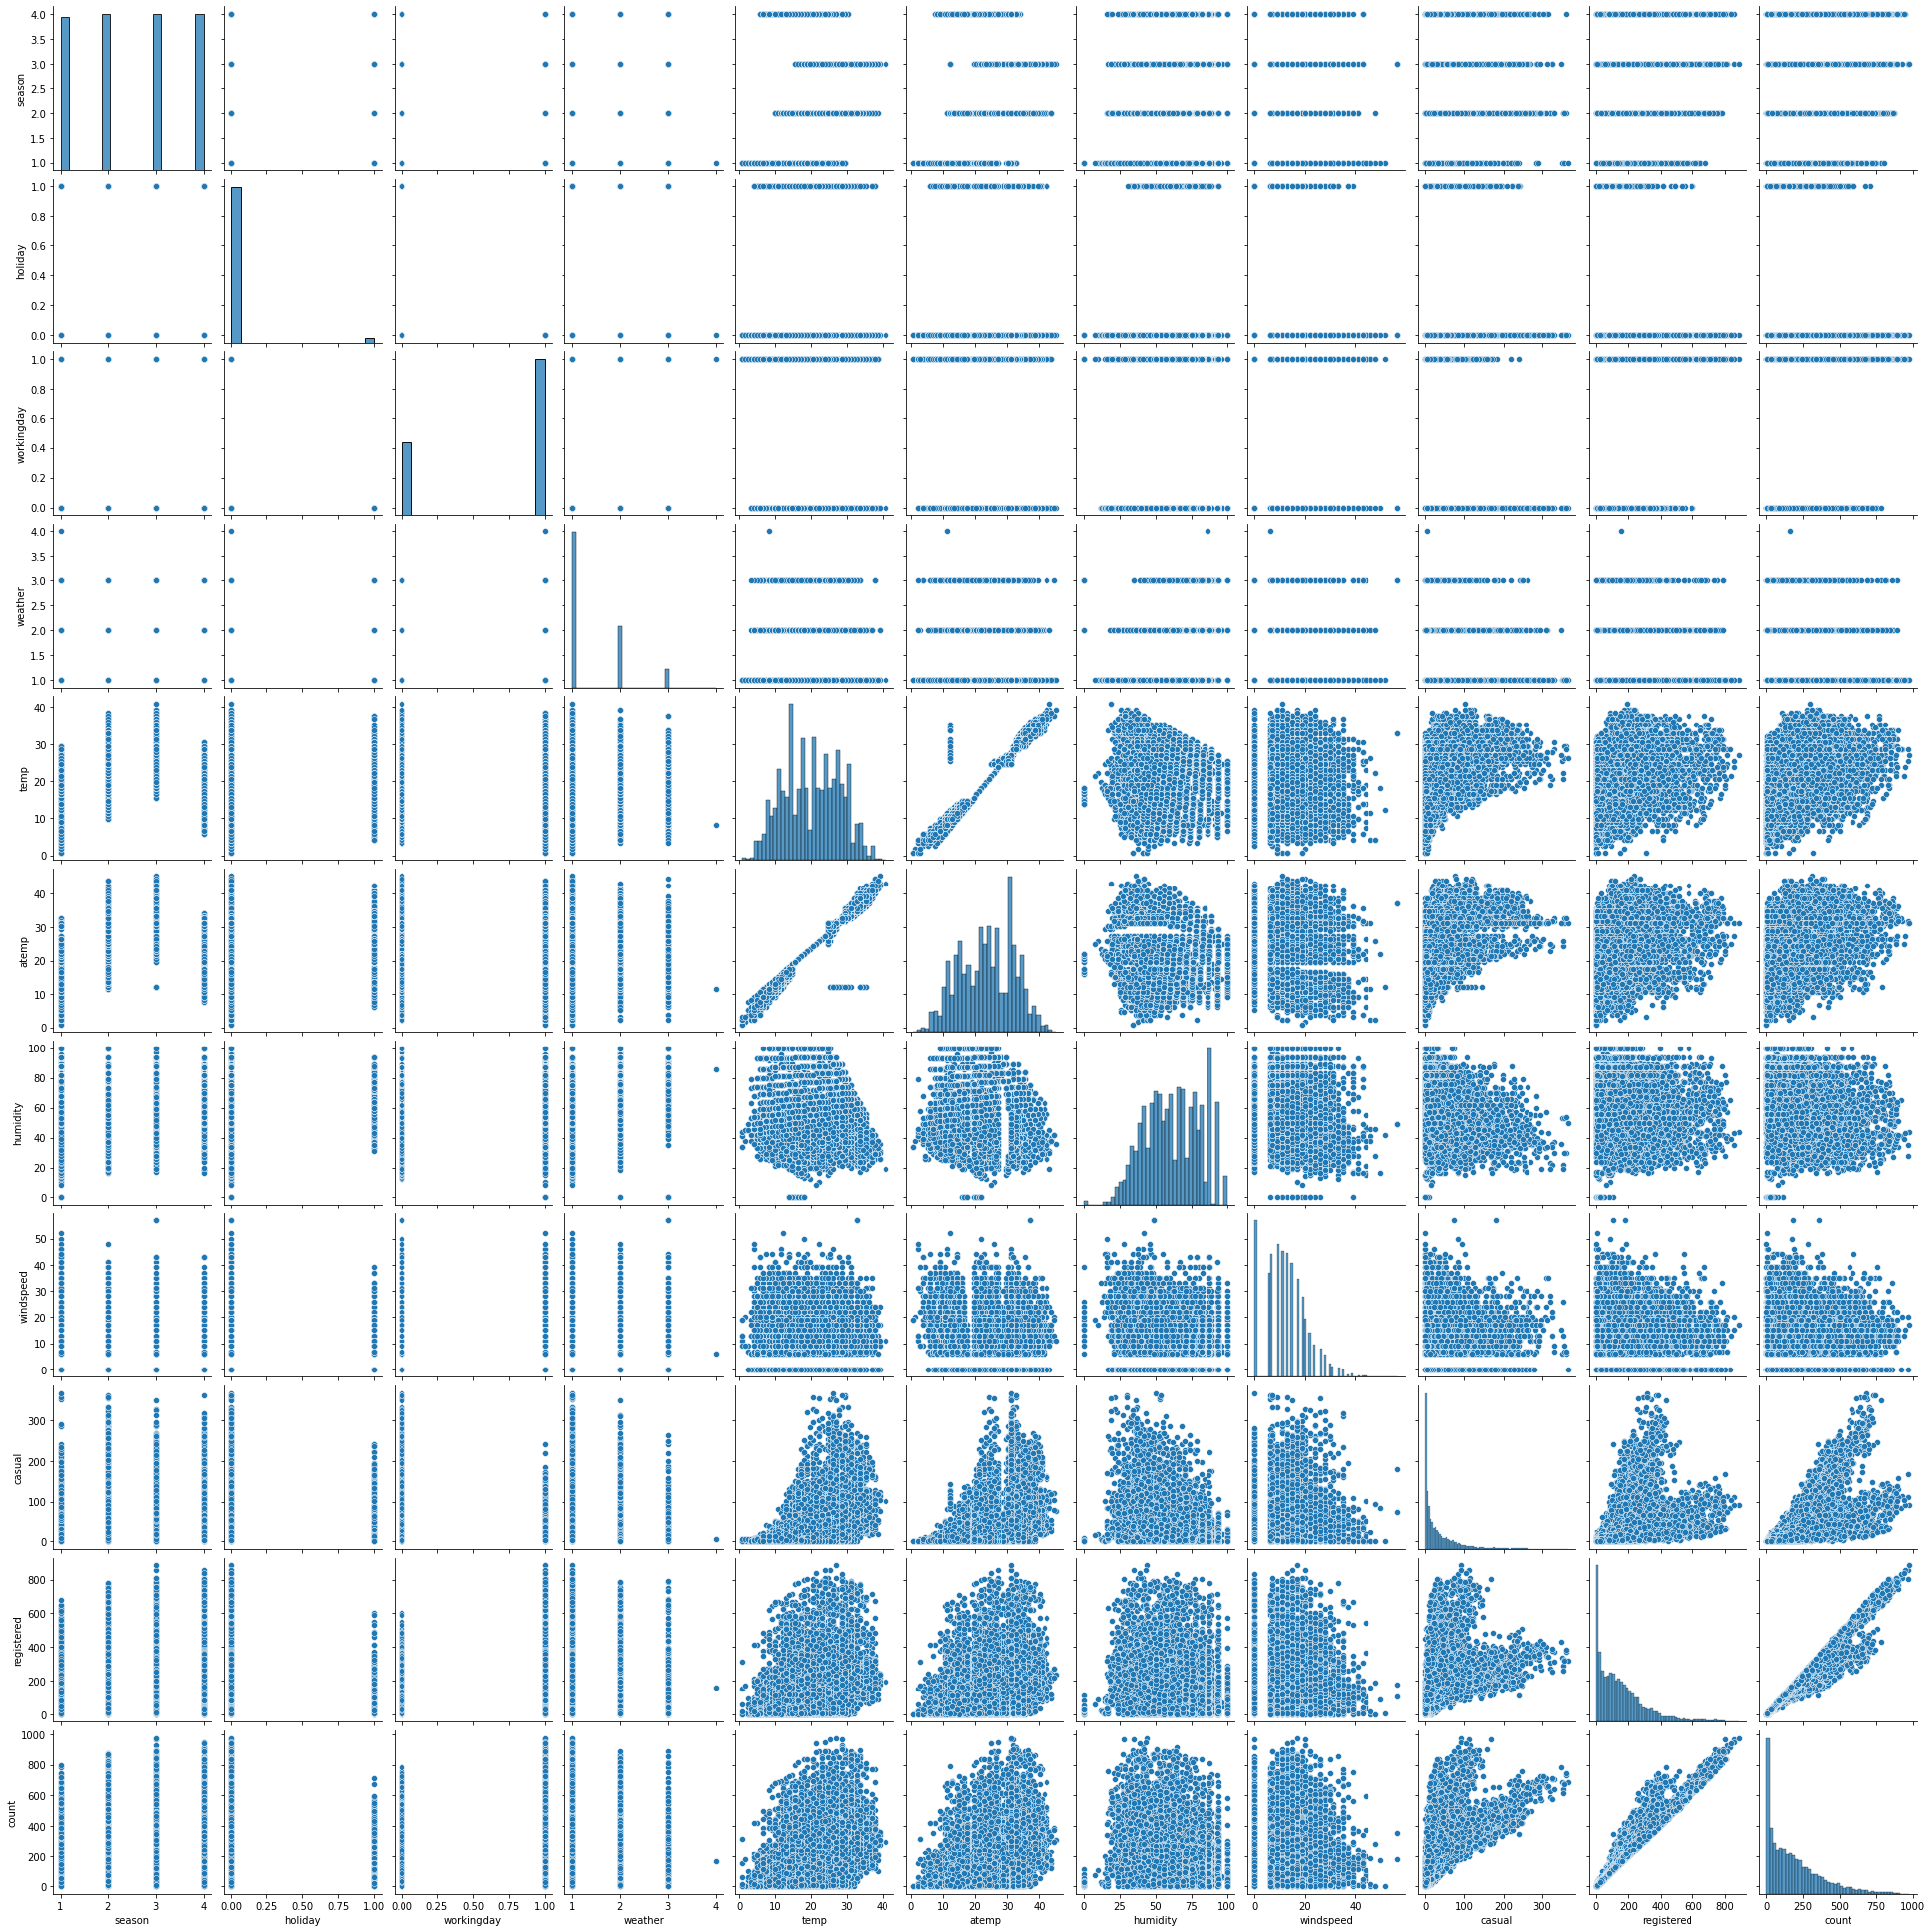

In [21]:
sns.pairplot(df)

In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [32]:
from pandas_profiling import ProfileReport
pf = ProfileReport(df.drop('count',axis=1))
pf.to_file(output_file='output.html')

In [96]:
import datetime

In [98]:
df['datetime']=pd.to_datetime(df['datetime']) # converting into datetime datatype

In [108]:
df['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [121]:
df['datetime'].dt.hour # in all our data i have checked that there is no minute and no second values....

0         0
1         1
2         2
3         3
4         4
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: datetime, Length: 10886, dtype: int64

In [123]:
# Now extracting the Year,month,day,hour etc ... from the datetime variable column
df['Year'] = df['datetime'].dt.year
df['Month'] = df['datetime'].dt.month
df['Day'] = df['datetime'].dt.day
df['Hour'] = df['datetime'].dt.hour

In [126]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Day,Hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [127]:
# drop the datetime column now
df = df.drop(['datetime'],axis=1)

In [128]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Day,Hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [130]:
df['humidity'].mean() , df['humidity'].median()

(61.88645967297446, 62.0)

d:\anacondafiles\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='humidity', ylabel='Density'>

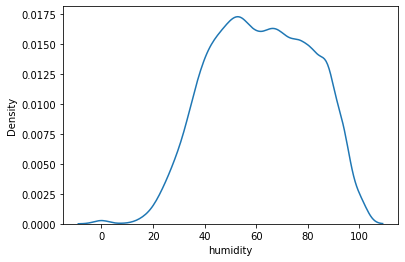

In [139]:
sns.distplot(df['humidity'],hist=False)

In [146]:
df['Year'].value_counts()

2012    5464
2011    5422
Name: Year, dtype: int64

d:\anacondafiles\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

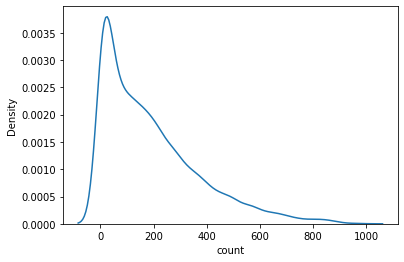

In [147]:
sns.distplot(df['count'],hist=False)

<AxesSubplot:xlabel='Hour'>

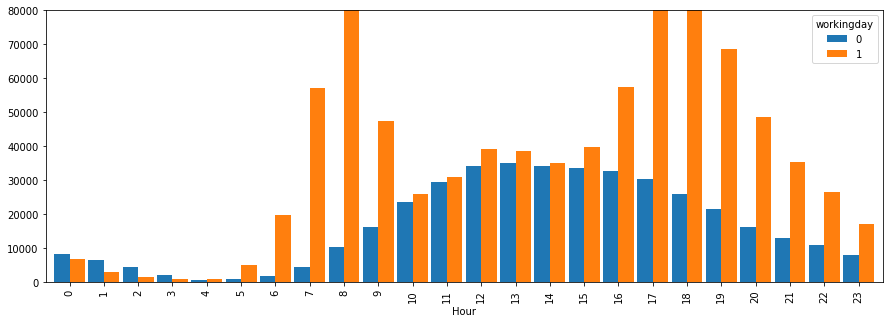

In [157]:
(df[df['Year']==2012].groupby(['Hour','workingday'])['count'].agg('sum').unstack()).plot(kind='bar',ylim=(0,80000),figsize=(15,5),width=0.9)

<AxesSubplot:xlabel='Hour'>

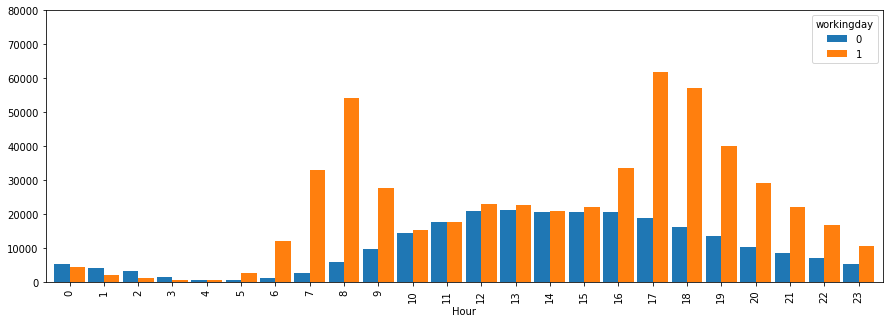

In [160]:
(df[df['Year']==2011].groupby(['Hour','workingday'])['count'].agg('sum').unstack()).plot(kind='bar',ylim=(0,80000),figsize=(15,5),width=0.9)

<AxesSubplot:xlabel='Month'>

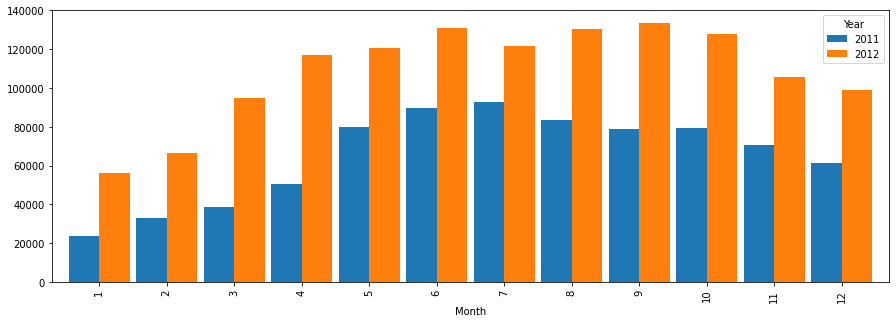

In [162]:
(df.groupby(['Month','Year'])['count'].agg('sum').unstack()).plot(kind='bar',figsize=(15,5),width=0.9)

<AxesSubplot:xlabel='Hour'>

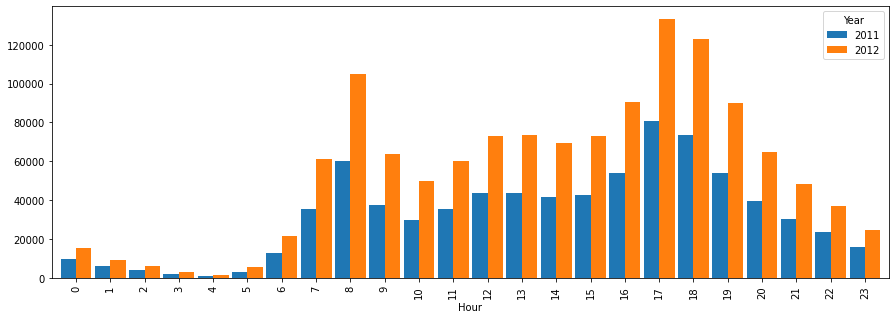

In [166]:
(df.groupby(['Hour','Year'])['count'].agg('sum').unstack()).plot(kind='bar',figsize=(15,5),width=0.9)

In [169]:
df.Hour

0         0
1         1
2         2
3         3
4         4
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: Hour, Length: 10886, dtype: int64

In [171]:
# now convert the Hour column into numeric features
def categorical_to_numberic(data) :
    if 0 <= data < 6:
        return 0
    elif 6 <= data <13:
        return 1
    elif 13 <= data < 19 :
        return 2
    elif 19 <= data <24:
        return 3 
    
    

In [172]:
df['Hour'] = df['Hour'].apply(categorical_to_numberic)
df['Hour']

0        0
1        0
2        0
3        0
4        0
        ..
10881    3
10882    3
10883    3
10884    3
10885    3
Name: Hour, Length: 10886, dtype: int64

In [173]:
df['Hour'].value_counts()

1    3186
2    2736
0    2684
3    2280
Name: Hour, dtype: int64

In [174]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Day,Hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,0
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,0
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,0


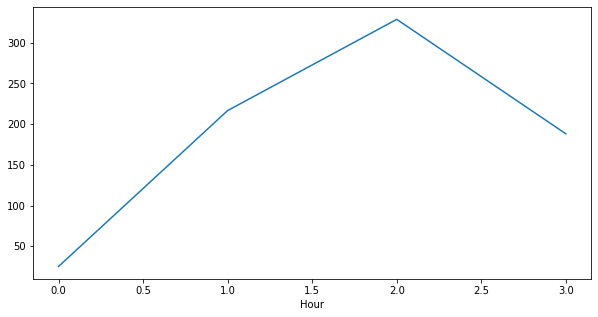

In [184]:
# Hour vs Count Graph showing the average bike demand based on the hour
plt.figure(figsize=(10,5))
hours = df.groupby(['Hour'])['count'].mean()
hours.plot(kind='line')
plt.show()


In [176]:
df.groupby('Hour').mean()['count']

Hour
0     25.177720
1    216.612680
2    328.587719
3    188.050439
Name: count, dtype: float64

In [179]:
df.groupby('Hour')['count'].mean()

Hour
0     25.177720
1    216.612680
2    328.587719
3    188.050439
Name: count, dtype: float64

<AxesSubplot:xlabel='temp'>

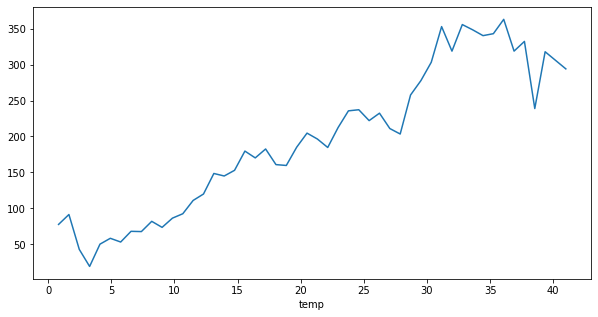

In [188]:
plt.figure(figsize=(10,5))
(df.groupby('temp')['count'].mean()).plot(kind='line')

In [189]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Day,Hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,0
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,0
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,0


<AxesSubplot:xlabel='holiday'>

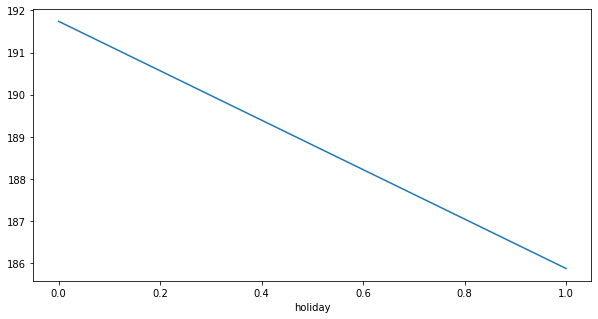

In [191]:
plt.figure(figsize=(10,5))
(df.groupby('holiday')['count'].mean()).plot(kind='line')